# k-means 클러스터링의 최적의 k값을 찾는 방법

1. 비즈니스 도메인 지식
    - 정성적인 선정 방법
  
    - 데이터적인 근거는 다소 부족, 클러스터링 자체가 해석을 통한 비즈니스 인사이트 도출이 주 목적이기 때문에 많은 프로젝트에서 이 방법을 사용
  
2. 엘보우 기법(Elbow method)
    - 군집 내 중심점과 관측치 간 거리 합(Inertia value)이 급감하는 구간의 k개수를 선정
  
    - 군집의 수가 k개 였을 때보다 k + 1 개 일 때 거리합이 급감했다는 것은 유사한 속성의 관측치들끼리 잘 묶었다는 것을 의미
  
    - 따라서 k가 더 증가해도 거리합이 별로 줄지 않을 때는 k를 증가시킬 필요가 없다는 의미
  
    - 이 때의 그래프 모양이 팔꿈치형태를 하고 있기 때문에 엘보우 기법이라고 불림
3. 실루엣 계수(silhouette coefficient) 활용
    - 실루엣 계수 : 군집 안의 관측치들이 다른 군집과 비교해서 얼마나 비슷한지를 나타내는 수치
  
    - 동일한 군집 안에 있는 관측치들 간의 평균 거리와 가장 가까운 다른 군집과의 평균 거리를
  
    - $$ S(i) = \frac{b(i) - a(i)}{\max{a(i), b(i)}} $$
  
        - $ a(i) $ : i와 동일한 군집에 속한 관측치들 간의 평균 거리
        - $ b(i) $ : i와 다른 군집 중 가장 가까운 군집까지의 평균 거리
    - 동일한 군집 내 관측치들 간 평균 거리가 집단 간 평균 거리보다 짧을수록 실루엣 계수는 높아짐
  
    - 범위는 -1 부터 1사이의 값을 가지며 실루엣 계수가 1에 가까울수록 군집이 적합하게 나누어졋음을 의미

# DBSCAN

- 아무리 k값을 잘 지정한다고 해도 데이터의 형태가 k-means 클러스터링 알고리즘에 적합하지 않으면 효과적인 군집화를 할 수 가 없음

- 밀도 기반의 원리를 이용한 클러스터링 기법이 DBSCAN(Density-based spatial clustering of application with noise)

- DBSCAN은 별도의 k값 지정이 필요 없고 관측치들의 밀도를 통해 자동으로 적절한 군집의 수를 찾음
    - 밀도 기준 2가지
        - 기준 관측치로부터 "이웃"한 관측인지 구별할 수 있는 **거리 기준(epsilon)**이 필요
            - 거리 기준값이 크면 데이터 공간상 멀리 있는 관측치도 이웃한 관측치로 인식
         
        - 거리 기준 내에 포함된 **이웃 관측치 수**에 대한 기준 필요
            - 특정 거리 안에 몇 개 이상의 관측치가 있어야 하나 군집으로 판단할 것인가를 결정
         
- 기준 밀도를 가진 관측치들을 기준으로 군집화를 하기 때문에 U자형과 같이 오목한 데이터나 H와 같은 모양의 데이터 분포도 효과적으로 군집화할 수 있고 군집이 명확하지 않은 이상치를 잘 분류해 낼 수있음

- **계산량이 너무 많아서 데이터 양이 너무 많으면 힘들다**

# 군집화 모델 분석

- 군집화 모델은 분류된 각 군집의 특성을 파악하여 군집에 이름을 붙여서 그 특징을 정의하는 작업이 무엇보다 중요
- 클러스터링에 사용한 독립변수들이 다른 군집에 비해서 어떠한 특성을 가지고 있는지를 확인하여 각 군집을 명확하게 정의
- 그 다음 각 군집의 특성에 맞는 비즈니스 전략을 수립

- 각 군집에 어느 정도의 데이터가 할당 되었는지를 확인하여,특정 군집에 너무 많은 데이터가 쏠렸거나, 너무 적은 데이터가 할당되어 군집으로서 효율성이 떨어지는 군집은 없는지 확인
- 각 독립변수들이 다른 군집 혹은 전체 평균과 얼마나 다른지 확인하여 군집의 특성을 파악
    - 이를 통해 군집의 이름을 설정
    - 특성이 확실하여 쉽게 정의할 수 있는 군집도 있지만, 별다른 특성이 업슨느 군집도 있을 수 있음
    - 이 경우 무리해서 억지로 군집을 정의하기 보다는 비슷한 군집끼리 묶어서 "일반 고객"등으로 별도 분류 하는 것도 하나의 방법
- 군집간의 수치적 차이를 보다 확실하게 파악하기 위해서는 t-test 나 ANOVA등을 통해 군집간 평균값 차이가 우연한 차이인지 통계적으로 유의미한 차이인지 검증하는 절차!!!!

In [3]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer 
# yellowbrick 군집화 시각화 라이브러리 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score # 실루엣 계수 계산
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./data/Mall_Customers.csv")

In [6]:
df.head() # 가상으로 만든 데이터같아요

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# 산점도 행렬 시각화
# ID 컬럼 제거 (도움안됨)
df1 = df.drop("CustomerID", axis = 1)

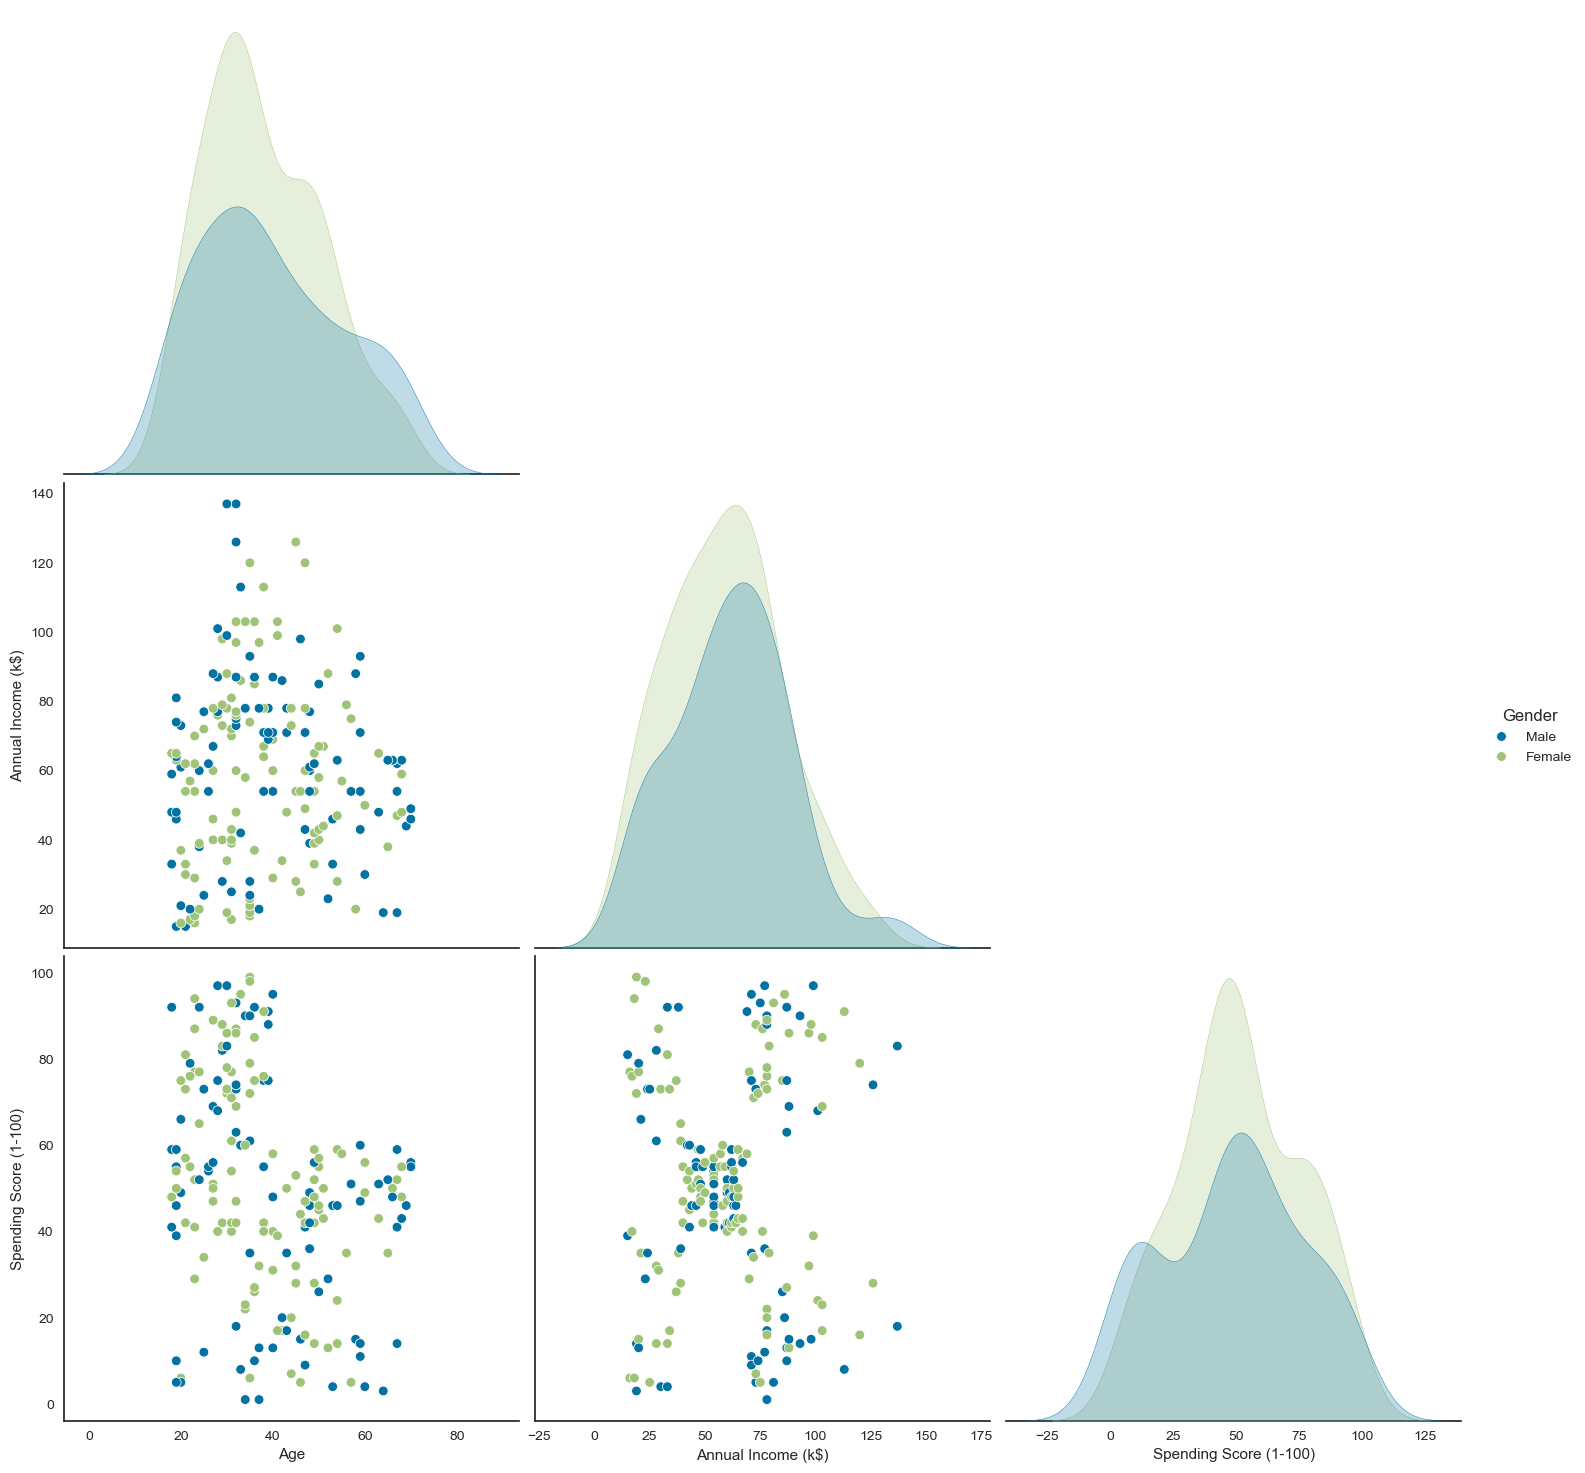

In [9]:
sns.set_style("ticks")
sns.pairplot(df1, hue = "Gender", height = 5, corner = True)
plot_kws = {"s" : 100}
plt.show()

- 분포를 관찰한다 : 딱히 변수끼리 큰 차이가 없네
- annual income 에서 뭔가 보인다...!

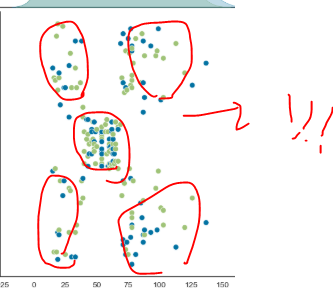

- 각 변수 간의 관계를 파악하기 위해 산점도 행렬을 시각화하여 분포를 확인

- spending score 변수와 annula income 변수와의 관계에서 약 5개 정도의 군집이 나눠질 수 있을 것을 로 보이지만 연령과 성별 연수도 함께 사용하여 군집화 할 예정이므로 이러한 분포는 참고로만 사용

In [11]:
df1.shape

(200, 4)

In [12]:
df1.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [14]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
# 거리 기반의 데이터니까 스케일링 해줄것임
# 성별도 따질꺼라서 어떻게 할지 고르기 => 원핫인코딩할것임~~

In [20]:
# 데이터 전처리
df2 = pd.get_dummies(df1, columns = ["Gender"], drop_first = True, dtype=float)

In [21]:
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1.0
1,21,15,81,1.0
2,20,16,6,0.0
3,23,16,77,0.0
4,31,17,40,0.0


In [22]:
df2.dtypes

Age                         int64
Annual Income (k$)          int64
Spending Score (1-100)      int64
Gender_Male               float64
dtype: object

In [23]:
# 스케일링

In [24]:
mm = MinMaxScaler()
df_minmax = mm.fit_transform(df2)

df_minmax = pd.DataFrame(data = df_minmax, columns=df2.columns)

In [25]:
df_minmax.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0
